<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/fall_2025_iub/content/lessons/11_spectral_analysis_intro/11_workalong_01_fft.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Work-along: Working with the FFT

<div style="max-width:720px"><div style="position:relative;padding-bottom:56.25%"><iframe id="kaltura_player" src='https://cdnapisec.kaltura.com/p/1751071/embedPlaykitJs/uiconf_id/55382703?iframeembed=true&amp;entry_id=1_4bwhhs1n&amp;config%5Bprovider%5D=%7B%22widgetId%22%3A%221_tbrlrim5%22%7D&amp;config%5Bplayback%5D=%7B%22startTime%22%3A0%7D'  allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" sandbox="allow-downloads allow-forms allow-same-origin allow-scripts allow-top-navigation allow-pointer-lock allow-popups allow-modals allow-orientation-lock allow-popups-to-escape-sandbox allow-presentation allow-top-navigation-by-user-activation" title="EAS-G 690 Lesson 12 - Fourier Transform Workalong 01" style="position:absolute;top:0;left:0;width:100%;height:100%;border:0"></iframe></div></div>

*Use [this link](https://iu.mediaspace.kaltura.com/media/t/1_4bwhhs1n/388761952) if you have issues viewing the embeded video above.*

This notebook explores Fourier transforms and the `numpy.fft` package on some simple examples and realistic problems.

In [3]:
""" Import libraries. """
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import pandas as pd

# use searborn poster v8
plt.style.use('seaborn-v0_8-poster')

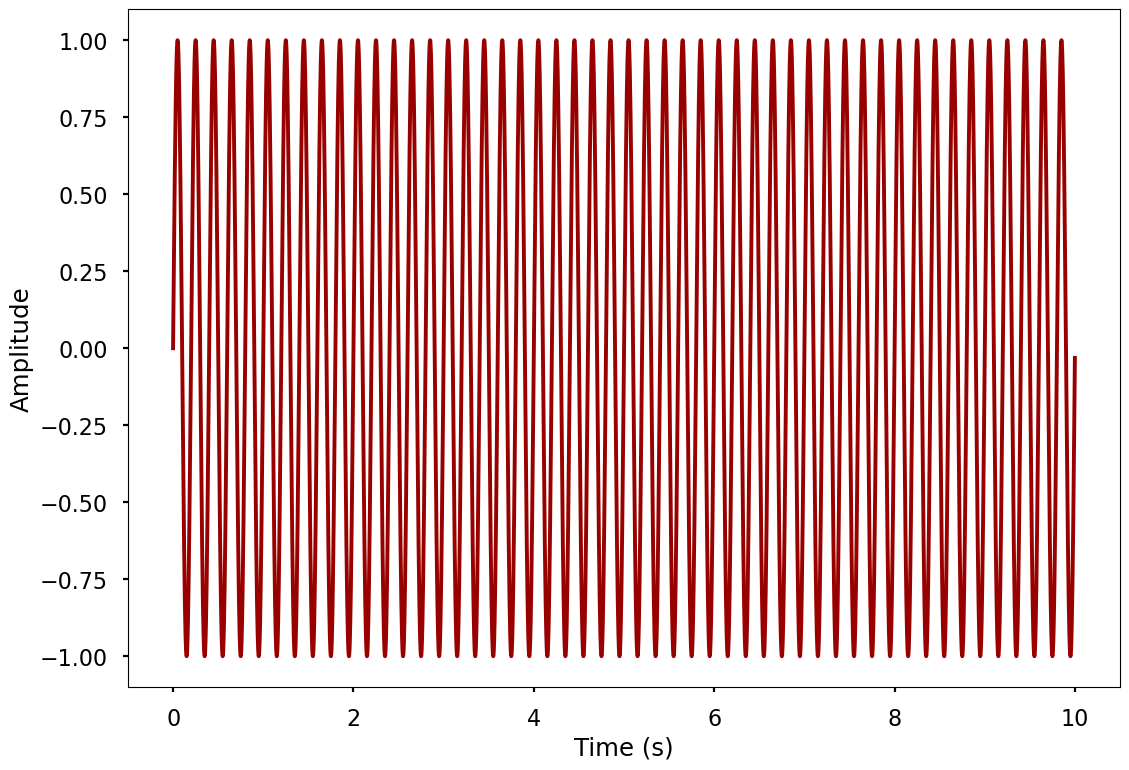

In [20]:
""" Create and plot a test signal. """

frequency = 5 #Hz

# convert to radians per second 
freq_rad = 2*np.pi*frequency # rad/s

# create a time variable
dt = 0.001 # seconds
t = np.arange(0, 10, dt)

# create a test signal 
y = np.sin(freq_rad*t) #+ np.sin(10*freq_rad*t)

#plot the test signal in the time domain
fig, ax = plt.subplots() 

ax.plot(t, y, color = '#990000')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')

plt. show()

$$ c_n = \sum\limits_{n = 0}^{N-1} f_1 e^{-i 2\pi k \frac{n}{N}}$$

The power spectrum is $$|c_n|^2\equiv c_n \cdot c_n^*$$

In [5]:
len(y)

10000

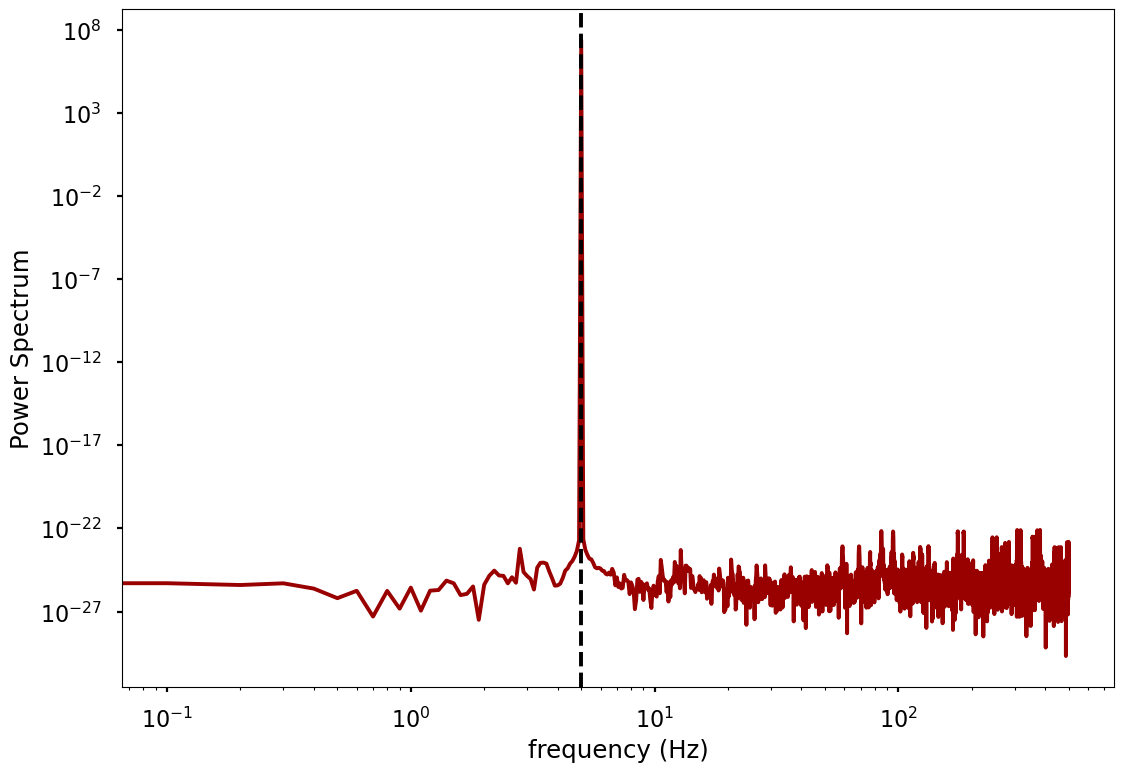

In [21]:
""" Compute the FFT of the test signal. """

# do the FFT
y_fft = fft.rfft(y)

y_fft.shape, y_fft # this is c_n above (complex)

# get the power spectrum from the FFT
y_power = np.abs(y_fft * np.conj(y_fft))

# get the frequencies for the FFT 
freqs = fft.rfftfreq(len(y), dt)

# plot the FFT 
fig, ax = plt.subplots()
ax.plot(freqs, y_power, color = '#990000')

# make the plot log-log
ax.set_xscale("log")
ax.set_yscale("log")

# add axis labels
ax.set_xlabel('frequency (Hz)')
#ax.set_ylabel(r"$|\mathcal{c_n}|^2$")
ax.set_ylabel('Power Spectrum')

# plot a line at the frequency  of the test signal
ax.axvline(frequency, color = '#000000', linestyle = '--')

plt.show()

In [24]:
""" Make a function to compute the power spectrum of a signal. """

def power_spectrum(y, t):
    """ Compute the power spectrum of a signal. Returns frequencies and the power spectrum: freqs, y_power """
    
    # Calculate the sampling rate
    dt = t[1] - t[0]

    # do the FFT
    y_fft = fft.rfft(y) # this is c_n above (complex)

    # get the power spectrum from the FFT
    y_power = np.abs(y_fft * np.conj(y_fft))

    # get the frequencies for the FFT 
    freqs = fft.rfftfreq(len(y), dt)

    return freqs, y_power


# also make a function for plotting
def plot_power_spectrum(freqs, y_power):
    """ Plots the power spectrum of a signal.  Returns the figure and axes: fig, ax """

    # plot the FFT 
    fig, ax = plt.subplots()
    ax.plot(freqs, y_power, color = '#990000')

    # make the plot log-log
    ax.set_xscale("log")
    ax.set_yscale("log")

    # add axis labels
    ax.set_xlabel('frequency (Hz)')
    #ax.set_ylabel(r"$|\mathcal{c_n}|^2$")
    ax.set_ylabel('Power Spectrum')

    return fig, ax
    


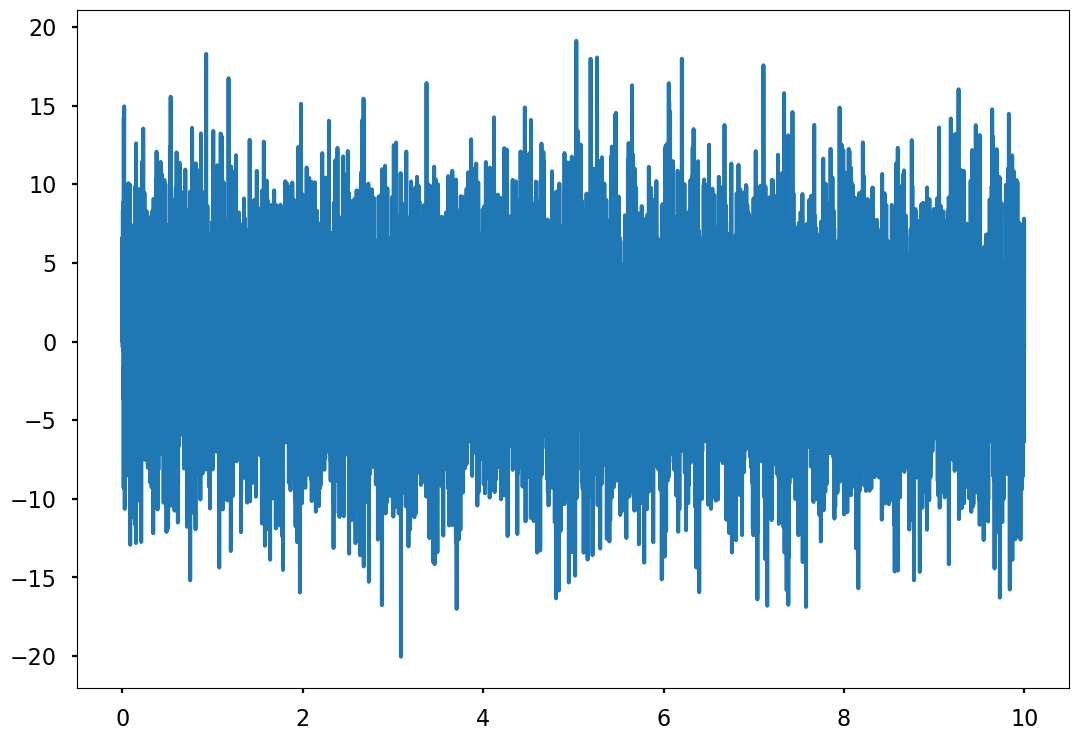

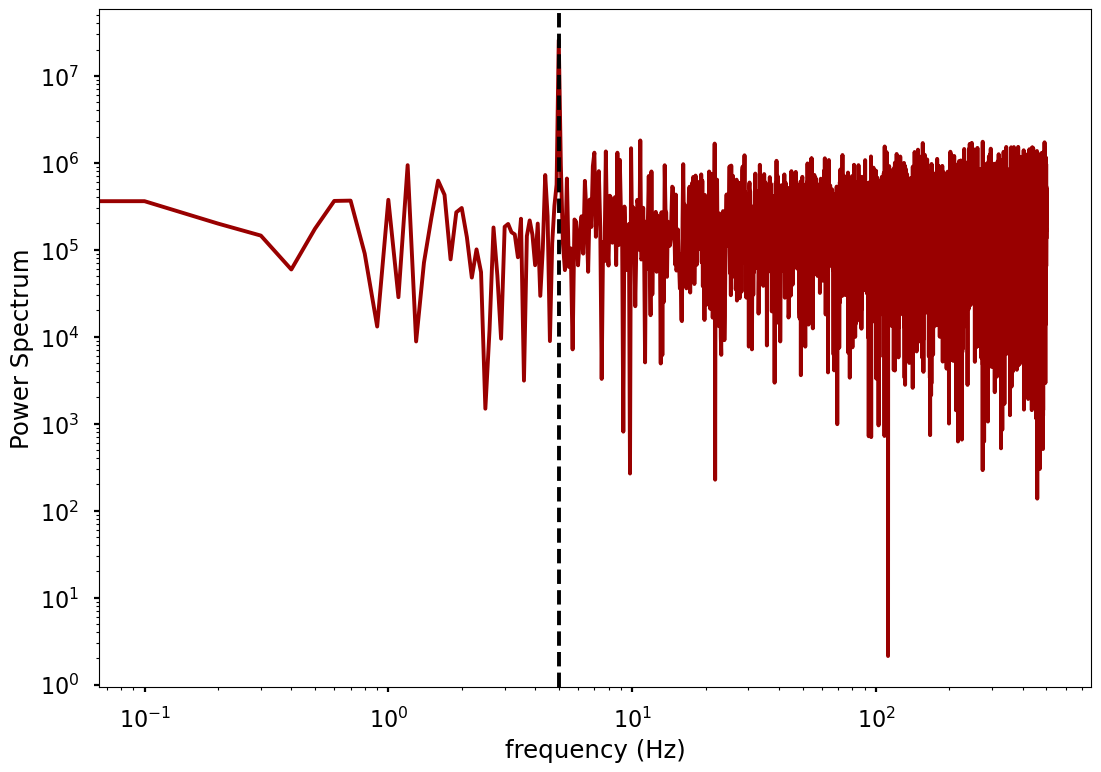

In [25]:
""" Get the power spectrum with noise added. """

# create a version of the signal with noise added
y_noisy = np.sin(freq_rad*t) + np.random.normal(scale = 5, size= len(t))
plt.plot(t, y_noisy)
plt.show()

freqs, y_power = power_spectrum(y_noisy, t)

fig, ax = plot_power_spectrum(freqs, y_power)

# plot a line at the frequency of the test signal
ax.axvline(frequency, color = '#000000', linestyle = '--')

plt.show()

# Real data

Download this data file: https://github.com/taobrienlbl/advanced_earth_science_data_analysis/blob/fall_2025_iub/content/lessons/12_spectral_analysis/cannelton_flow.dat

The data file was obtained from https://waterdata.usgs.gov/nwis/dv/?site_no=03303280&PARAmeter_cd=00060 on 11/10/23 at about 11:16 AM Eastern.  It represents daily stream flow from 1975-present at a gauge on the Ohio River in Cannelton, IN

In [26]:
""" Load the data file. """
skiprows = 30 

data = pd.read_csv("cannelton_flow.dat", skiprows=skiprows, delim_whitespace=True, 
                   names=['org', 'id', 'date', 'flow', 'flag'], parse_dates=['date'],)


# skiprows = 30 --> skips the long header text
# delim_whitespace=True --> columns are separated by spaces
# names=[...] --> we assign column names manually
# parse_dates --> parses the date column into datetime

/tmp/ipykernel_3634883/2615197333.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("cannelton_flow.dat", skiprows=skiprows, delim_whitespace=True,


In [27]:
print(data)

        org       id       date   flow flag
0      USGS  3303280 1975-10-01  94800    A
1      USGS  3303280 1975-10-02  79900    A
2      USGS  3303280 1975-10-03  69000    A
3      USGS  3303280 1975-10-04  74700    A
4      USGS  3303280 1975-10-05  71700    A
...     ...      ...        ...    ...  ...
17567  USGS  3303280 2023-11-05  40700    P
17568  USGS  3303280 2023-11-06  33400    P
17569  USGS  3303280 2023-11-07  31000    P
17570  USGS  3303280 2023-11-08  24800    P
17571  USGS  3303280 2023-11-09  19000    P

[17572 rows x 5 columns]


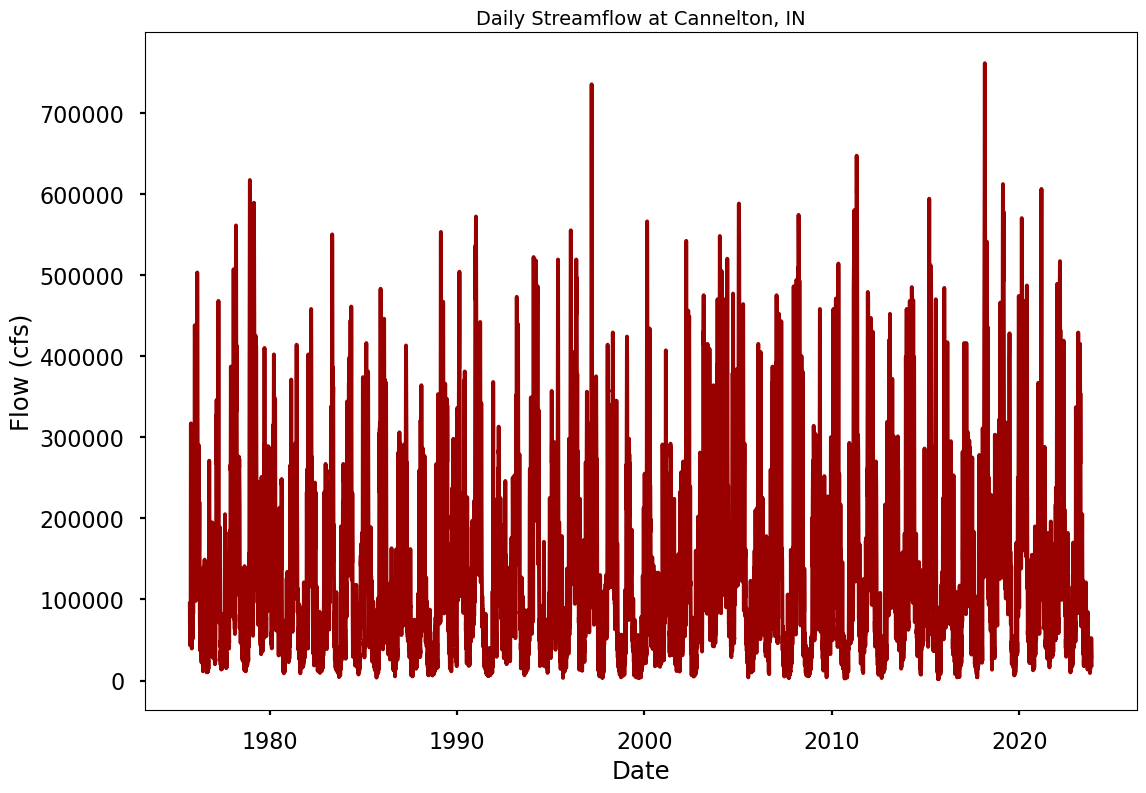

In [29]:
""" Plot a time series of the data. """
# This plot flow vs. time
# I can see seasonal patterns and major peaks

fig, ax = plt.subplots()
ax.plot(data['date'], data['flow'], color='#990000')
ax.set_title('Daily Streamflow at Cannelton, IN', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Flow (cfs)')
plt.show()


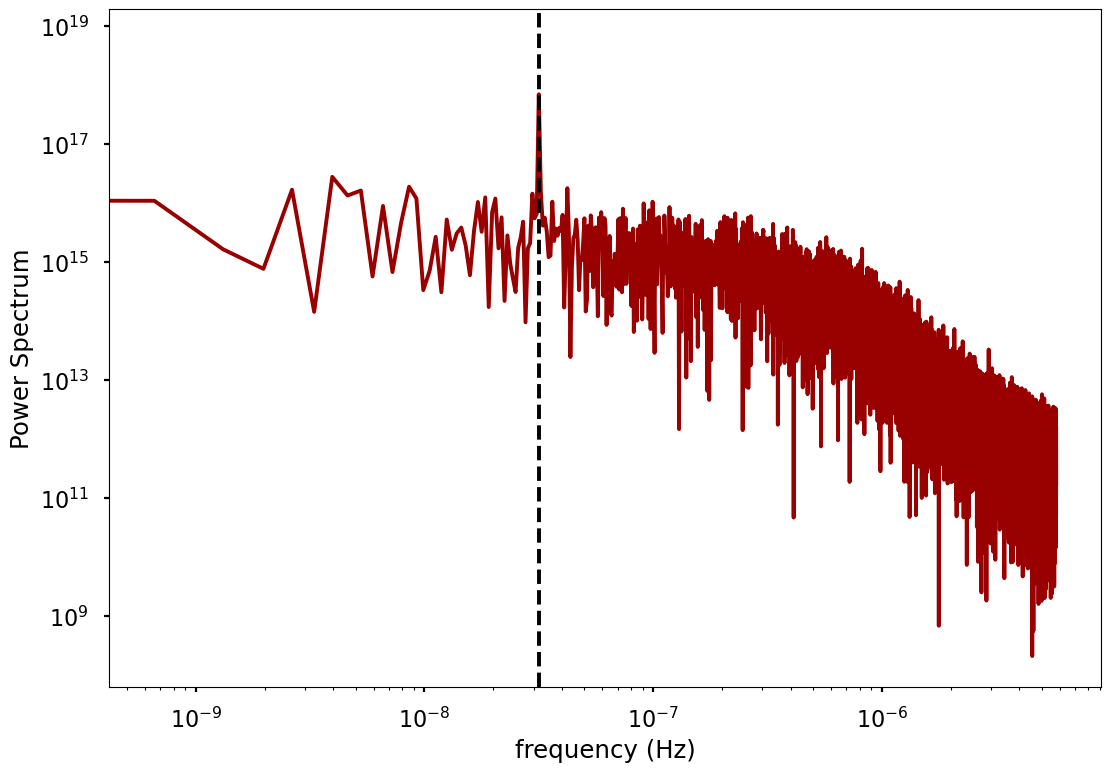

In [30]:
""" Plot the power spectrum of the data. """
# Fourier analysis requires a time axis that is:numerical and regulary spaced
# Dates must be converted into "seconds since the first observation"

time_seconds = (data['date'] - data['date'][0]).dt.total_seconds()
freqs, cfm_power = power_spectrum(data['flow'], time_seconds)

fig, ax = plot_power_spectrum(freqs, cfm_power)

year_seconds = 365.25*24*60*60
ax.axvline(1/year_seconds, color='black', linestyle='--')

plt.show()

# power_spectrum(...) --> computes the Fourier Transform
# freqs = frequencies in HZ
# cfm+power = power = |F(y)|²
# A vertical line is placed at the annual frequency
# A peak near this line means a strong annual signal

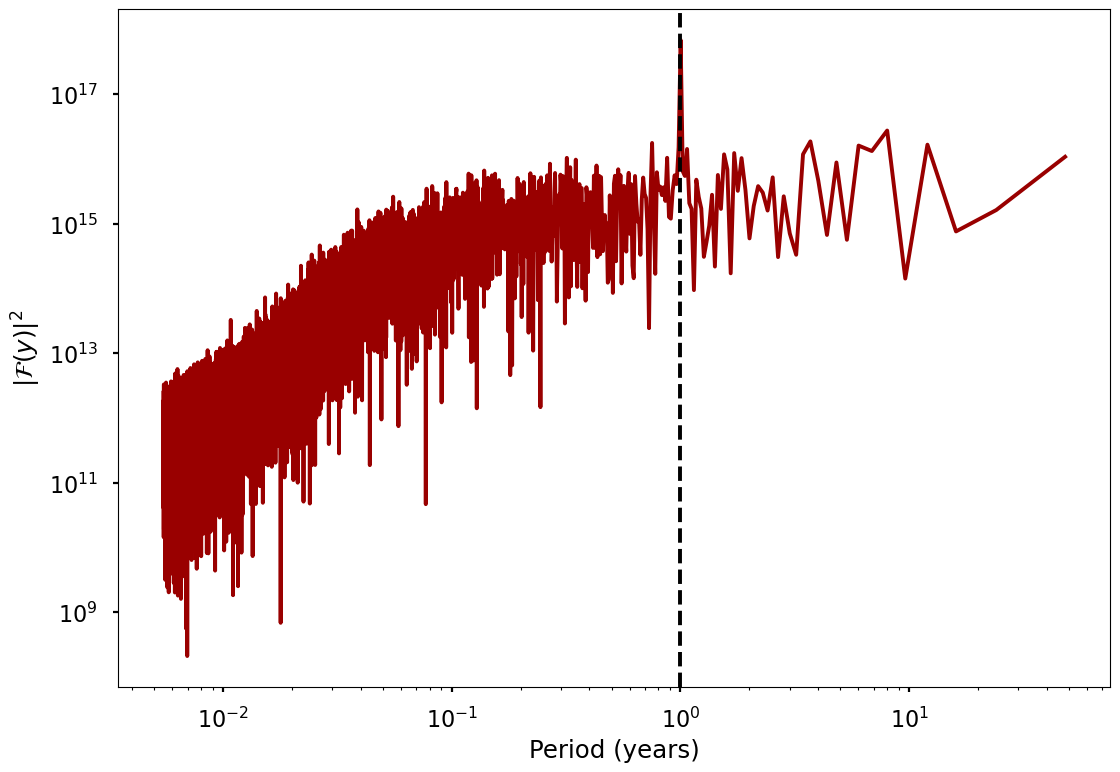

In [31]:
""" Plot the power spectrum of the data with the x-axis as period instead. """

valid = freqs > 0
periods = 1/freqs[valid] / (60*60*24*365.25)

fig, ax = plt.subplots()
ax.plot(periods, cfm_power[valid], color='#990000')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Period (years)')
ax.set_ylabel(r'$|\mathcal{F}(y)|^2$')

ax.axvline(1, color='black', linestyle='--')

plt.show()

# 1/freqs converts frequency --> period 
# Dividing by 60*60*24*365 converts seconds → years
# Removing freqs == 0 prevents division-by-zero warnings
# A vertical line is placed at 1 year

# I can analyse energy at different periods. 